In [3]:
import tensorflow as tf

tf.__version__

'2.7.0'

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16585900098895624549
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6267797504
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14808169716892447926
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2070 Super with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [1]:
from music21 import *
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np
import pickle
import glob
from __future__ import print_function, division
from music21 import converter, instrument, note, chord, stream
from tensorflow.keras.layers import Input, Dense, Reshape, Dropout, Bidirectional
from tensorflow.keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from keras.layers import CuDNNLSTM

In [2]:
from music21 import converter, instrument, note, chord
import glob

notes = []
durations = []


for file in glob.glob('mosu/*.mid') :
    try :
        midi = converter.parse(file) 
        notes_to_parse = None
    except :
        print(file)
    try:      
        parts = instrument.partitionByInstrument(midi)
    except TypeError:
        print('## 1 {} 파일 읽기 에러.'.format(file))
    if parts: 
        print('## 2 {} 여러 악기 사용 파일'.format(file))
        notes_to_parse = parts.parts[0].recurse()
    else: 
        print('## 3 {} 단일 악기 사용 파일'.format(file))
        notes_to_parse = midi.flat.notes
        
    for element in notes_to_parse:

        if isinstance(element, chord.Chord):
            notes.append('.'.join(n.nameWithOctave for n in element.pitches))
            durations.append(element.duration.quarterLength)

        if isinstance(element, note.Note):
            if element.isRest:
                notes.append(str(element.name))
                durations.append(element.duration.quarterLength)
            else:
                notes.append(str(element.nameWithOctave))
                durations.append(element.duration.quarterLength)

## 3 mosu\Mozart_K331_1st-mov_p01.mid 단일 악기 사용 파일
## 3 mosu\Mozart_K331_1st-mov_p02.mid 단일 악기 사용 파일
## 3 mosu\Mozart_K331_1st-mov_p03.mid 단일 악기 사용 파일
## 3 mosu\Mozart_K331_1st-mov_p04.mid 단일 악기 사용 파일
## 3 mosu\Mozart_K331_1st-mov_p05.mid 단일 악기 사용 파일
## 3 mosu\Mozart_K331_1st-mov_p06.mid 단일 악기 사용 파일
## 3 mosu\Mozart_K331_1st-mov_p07.mid 단일 악기 사용 파일
## 3 mosu\Mozart_K331_1st-mov_p08.mid 단일 악기 사용 파일
## 3 mosu\Mozart_K331_1st-mov_p09.mid 단일 악기 사용 파일
## 3 mosu\Mozart_K331_1st-mov_p10.mid 단일 악기 사용 파일
## 3 mosu\Mozart_K331_1st-mov_p11.mid 단일 악기 사용 파일
## 3 mosu\Mozart_K331_1st-mov_p12.mid 단일 악기 사용 파일
## 3 mosu\Mozart_K331_1st-mov_p13.mid 단일 악기 사용 파일
## 3 mosu\Mozart_K331_1st-mov_p14.mid 단일 악기 사용 파일
## 3 mosu\Mozart_K331_1st-mov_p15.mid 단일 악기 사용 파일
## 3 mosu\Mozart_K331_1st-mov_p16.mid 단일 악기 사용 파일
## 3 mosu\Mozart_K331_1st-mov_p17.mid 단일 악기 사용 파일
## 3 mosu\Mozart_K331_1st-mov_p18.mid 단일 악기 사용 파일
## 3 mosu\Mozart_K331_1st-mov_p19.mid 단일 악기 사용 파일
## 3 mosu\Mozart_K331_1st-mov_p20.mid 단일 악기 사용 파일


In [4]:
print('\nduration', 'pitch')
for n,d in zip(notes,durations):
    print(d, '\t', n)


duration pitch
1.0 	 C#5.E4.A3
1/3 	 D5.B3
0.5 	 C#5.E4.A3
1.0 	 E5.E4.C#4
0.25 	 E5.C#4.E4
2/3 	 B4.E4.G#3
1/3 	 B4.E4.G#3
1/3 	 C#5.A3
0.5 	 B4.G#3.E4
1.0 	 D5.E4.B3
0.25 	 D5.B3.E4
1.0 	 A4.E4.F#3
0.5 	 A4.F#3
0.5 	 E4.F#3
1/3 	 B4.E4.G#3
2/3 	 B4.E4.G#3
0.5 	 B4.G#3
0.5 	 E4.G#3
0.5 	 C#5.A3.E4
2/3 	 E5
1.0 	 B4.D3
2/3 	 D5
2.0 	 C#5
0.25 	 E3
1.0 	 A4
2.0 	 E3
0.25 	 B4.G#4
1.0 	 C#5.E4.A3
1/3 	 B3.D5
0.5 	 C#5.A3.E4
2/3 	 E5.C#4.E4
1/12 	 E5.C#4.E4
0.25 	 E5.C#4.E4
1.25 	 B4.E4
0.75 	 G#3
0.5 	 A3.C#5
0.25 	 B4.G#3
0.5 	 E4
5/12 	 B4.G#3
0.75 	 D5.B3.E4
2/3 	 D5
1/3 	 B3.E4
1/3 	 A4
1/3 	 E4.F#3
17/12 	 A4
2/3 	 E4.F#3
0.75 	 B4
0.5 	 E4.G#3
2/3 	 C#5.A3
2/3 	 E4.A3
1.0 	 D5.D3
2/3 	 F#4.B4
1.0 	 C#5.E4.A4
4/3 	 E3
0.5 	 B4.E2.G#4
1/3 	 D4
1.0 	 A4.A2.E4.C#4
1/3 	 C#5.A3.E4
11/12 	 C#5.A3.E4
1/3 	 B3.D5
0.5 	 C#5.A3.E4
0.75 	 E5.C#4.E4
0.25 	 E5.C#4.E4
1.0 	 B4.G#3.E4
0.25 	 C#5.A3
0.5 	 B4.G#3.E4
0.25 	 D5.E4.B3
0.5 	 D5.E4.B3
0.25 	 D5.E4.B3
0.75 	 A4.E4.F#3
0.5 	 A4.E4.F#3
0.

1/3 	 B4.G#4
1.25 	 C#5.E4
1.25 	 A3.E4
0.5 	 D5.B3
1.25 	 C#5.A3
0.25 	 E4
1.0 	 E5.C#4.E4
1.0 	 E5.C#4
1/3 	 E4
1/3 	 B4.E4
0.25 	 G#3
1.0 	 B4.E4
0.75 	 G#3
0.5 	 C#5.A3
1.0 	 B4.G#3
1/3 	 E4
1.0 	 D5.E4.B3
1.0 	 D5.B3
1/3 	 E4
1.75 	 A4.F#3
1.0 	 E4
1.0 	 B4.G#3
1/3 	 E4
1/3 	 C#5
1/3 	 A3.E4
2/3 	 C#5
1/6 	 A3.E4
1.0 	 D5
1/3 	 F#4.B4
1.25 	 D3
0.75 	 C#5.A4.E4
0.25 	 E3
2/3 	 E3
5/3 	 E2
1/3 	 B4.E4.G#4
2.0 	 B4
2.25 	 E4.G#4.A2
1/3 	 C#5.A4
1.25 	 C#5
0.25 	 A4.A3.A2
0.25 	 E4.A3.A2
1/3 	 D5.B2.B3.E4.G#4
0.5 	 E5.C#3.A4.E4
0.5 	 C#4
0.5 	 C#4
0.25 	 F#5.D3
1.0 	 D4
0.25 	 G#5.A5
4/3 	 A4
1.0 	 E3.C#4
2/3 	 A4
5/3 	 E3.D4
0.75 	 C#5
0.25 	 G#4
2/3 	 G#4
1.0 	 B4
1.25 	 A4.C#4.A3
1.25 	 E5.A3
4/3 	 C#4
2/3 	 F#5
2/3 	 E5.E4
1/3 	 E5.E4
4/3 	 F#5
5/3 	 A3
4/3 	 D4
1/3 	 F#5
1.0 	 F#4
4/3 	 A3
0.25 	 F#5.G#5
1.0 	 A5
0.5 	 D4
0.25 	 G#5
1/3 	 A3
0.5 	 D4
0.5 	 G#5
0.5 	 F#5
1.0 	 F#4
1.0 	 F#5
1.5 	 A3
0.25 	 E5
1.0 	 C#4
0.25 	 E5
1.0 	 E4
0.5 	 E5
1/3 	 A3.C#4
0.5 	 E5
1/3 	 A3.C#

1.75 	 A4
1.25 	 E4.F#3
2/3 	 B4.G#3
2/3 	 E4.G#3
1.0 	 C#5.A3
0.5 	 E4
2/3 	 D5
1.0 	 B4.F#4
1.25 	 D3
1.25 	 C#5.A4.E4
2.25 	 E3
1/3 	 B4.G#4.E4
0.25 	 E2
1/3 	 B4.G#4.E4
1/12 	 E3
1.25 	 E2
1.5 	 B4
3.0 	 E4.A2
1.25 	 G#4
1.0 	 C#5.A4
1.75 	 C#5
4/3 	 E4.A4.A2.A3
1.25 	 D5
0.5 	 G#4.E4.B2.B3
0.75 	 E5
2/3 	 E4
0.75 	 A4.C#4.C#3
11/12 	 E5
0.25 	 A4.C#4.C#3
0.75 	 F#5
1.0 	 D3.D4
0.25 	 G#5
0.25 	 A5
4/3 	 A4
1.0 	 E3.C#4
5/12 	 A4
0.25 	 C#5.E3.G#4.D4
2/3 	 B4
1.0 	 A4
5/3 	 A3
2.0 	 C#4
2/3 	 E5
1.75 	 A3
1.25 	 C#4
1/3 	 F#5
1/3 	 E5.E4
0.5 	 F#5
0.5 	 A3
0.5 	 F#5
7/6 	 A3
0.5 	 D4
2/3 	 F#4
1/3 	 F#5
1.75 	 A3
0.25 	 F#5.G#5
2/3 	 A5
0.5 	 D4
0.5 	 G#5
0.25 	 F#5
0.5 	 F#4
2/3 	 F#5
1.75 	 A3
1/3 	 E5.C#4
0.25 	 E5.E4
0.75 	 E5.A3
1/3 	 C#4
0.25 	 C#5
0.25 	 C#5
1/3 	 A4
2/3 	 E5.D4.G#3
1/3 	 D5
1/3 	 B4
0.75 	 E5.C#4
1.75 	 A3
0.5 	 C#5
0.75 	 A4.F#3
1/3 	 E-4
0.75 	 C#5
2/3 	 A4
2/3 	 E3.E4
1.0 	 C#5
7/12 	 A4
25/12 	 E3.E4
0.5 	 B4
1.5 	 G#4
1.0 	 C#5.E4.A3
0.25 	 C#5.E4.A3
0

0.5 	 E5.A4.E4
5/3 	 C#4.C#3
0.75 	 F#5
1/3 	 D4.D3
0.25 	 G#5.A5
1.5 	 A4
1.0 	 C#4.E3
1.0 	 C#5.G#4
0.25 	 E3
2.0 	 D4
1.25 	 E3
0.5 	 B4
1/3 	 A4.C#4
0.25 	 A3
47/12 	 A4.C#4
4.0 	 A3
0.25 	 A3
1.5 	 C#5
2.25 	 E4
2.0 	 A3
0.75 	 D5.B3
2/3 	 C#5.E4.A3
5/3 	 E5.E4
1.75 	 C#4
0.5 	 E5.C#4
0.75 	 E4
1.5 	 B4.E4
1.5 	 G#3
0.75 	 B4.E4
0.75 	 C#5
0.25 	 A3
1.0 	 B4.E4.G#3
1.25 	 D5.E4.B3
0.5 	 D5.E4.B3
2/3 	 D5.E4
5/3 	 B3
1.0 	 A4.E4.F#3
2/3 	 A4.E4.F#3
2/3 	 A4.E4
5/3 	 F#3
1.0 	 B4.E4.G#3
2/3 	 B4.E4.G#3
1.5 	 B4
0.75 	 E4.G#3
1.0 	 C#5.A3
1.0 	 E4
1.75 	 E4
0.75 	 E5
1.25 	 B4
2.0 	 D3
1.0 	 D5
0.5 	 C#5
0.25 	 E3
0.5 	 A4
0.25 	 E3
1.0 	 C#5
3.0 	 E3
1.25 	 A4
2/3 	 B4.G#4
2.0 	 C#5.E4.A3
0.5 	 D5.B3
0.75 	 C#5.A3.E4
1.5 	 E5.E4.C#4
0.5 	 E5.C#4
0.5 	 E4
2.0 	 B4.E4
1.25 	 G#3
2/3 	 C#5
0.25 	 A3
0.5 	 B4.G#3
0.5 	 E4
0.75 	 B4.G#3
0.25 	 E4
1.5 	 D5.E4.B3
1/3 	 D5.E4
1/3 	 B3
1/3 	 D5.E4
17/12 	 B3
5/3 	 E4
2.75 	 A4.F#3
0.25 	 B4
0.25 	 E4
0.25 	 G#3
17/12 	 B4
0.5 	 E4
1.0 	 G#3


1.25 	 A5
1.0 	 D4
1/3 	 G#5
1/3 	 F#4.F#5
0.75 	 F#5
2.0 	 A3
0.25 	 E5
1.25 	 C#4
0.25 	 E4.E5
1.0 	 E5.A3.C#4
0.25 	 C#5
1/3 	 A4
1.0 	 E5.D4
1.0 	 G#3
0.25 	 D5
1/3 	 B4
0.5 	 E5
0.5 	 A3.C#4
0.25 	 E5
0.5 	 A3.C#4
0.5 	 C#5
0.5 	 A4.E-4.F#3
1.75 	 C#5.A4
1.75 	 E3
1.75 	 E4
0.25 	 C#5.A4
7/12 	 E3
11/12 	 E4
0.5 	 B4.G#4
1.25 	 C#5.E4.A3
0.5 	 D5.B3
0.5 	 E4.C#5
0.5 	 A3
0.5 	 A3
1.0 	 E4.E5.C#4
1/3 	 E5.E4.C#4
1.0 	 E4.B4.G#3
0.25 	 E4.B4.G#3
0.5 	 A3.C#5
1.25 	 B4.G#3
0.5 	 E4
0.75 	 E4.D5.B3
1/3 	 D5.E4.B3
1.75 	 A4
1.0 	 E4
1.25 	 F#3
0.5 	 E4.G#3
1.0 	 B4
2/3 	 E4.C#5.A3
0.5 	 D5.F#4
1.0 	 D3
0.5 	 B4.F#4
1.5 	 C#5
0.75 	 E3.E4.A4
0.5 	 B4.E4.G#4
1/3 	 E2
5/12 	 E2
2.25 	 B4.G#4.E4
2.25 	 A2.G#4.E4
1/3 	 C#5.A4
2.0 	 C#5
1.0 	 A3.E4.A4.A2
0.5 	 D5.B3.E4.G#4.B2
1.0 	 E5.A4.C#4.C#3
0.25 	 F5
1.0 	 E4.C#3
0.5 	 F#5.D4.D3
0.25 	 G#5.A5
1.25 	 A4.E3
0.75 	 C#4
1.0 	 C#5.D4
1.0 	 E3.G#4.D4
1/3 	 B4
5/3 	 A4.C#4.A3
25/12 	 A4.C#4.A3
0.75 	 C#5.E4
2/3 	 A3
11/12 	 C#5.E4
1/3 	 D5
0.2

2/3 	 A3.E4
0.5 	 E5.B4.D3
1.0 	 D5
2.5 	 E3
5/3 	 C#5
0.75 	 A4
0.5 	 B4.G#4
0.25 	 E4.C#5.A3
1.0 	 E4.C#5.A3
1/3 	 D5.B3
1.0 	 C#5.E4.A3
0.75 	 E5.E4.C#4
0.25 	 E5.E4.C#4
1.0 	 B4.E4.G#3
1/3 	 C#5.A3
0.5 	 B4.G#3.E4
0.75 	 D5.E4.B3
1.25 	 D5
0.25 	 E4.B3
1.5 	 A4
1.0 	 F#3.E4
0.5 	 B4.E4.G#3
0.5 	 A4
0.5 	 C#5.E4.A3
1.25 	 D5
0.5 	 B4.F#4
0.75 	 D3
0.25 	 C#5.E4.A4
2.0 	 E3
0.5 	 C#5.E4.A4
0.5 	 B4.G#4.E2.D4
1.0 	 A4.A2.E4
1.0 	 C#4
0.25 	 A4.A2.E4
1.25 	 C#5.E4.A3
0.25 	 B3.D5
2/3 	 A3.C#5
1.0 	 E5.E4.C#4
0.25 	 E5.E4.C#4
1.25 	 B4.E4
0.75 	 G#3
0.25 	 C#5.A3
0.5 	 B4.E4.G#3
0.75 	 D5.E4.B3
1.5 	 D5
0.25 	 E4.B3
1.25 	 A4.E4.F#3
1/3 	 A4.F#3.E4
1.0 	 B4.E4.G#3
0.25 	 B4
1/3 	 G#3.E4
1/3 	 C#5
1/3 	 A3.E4
1.0 	 C#5
5/12 	 A3.E4
0.5 	 E5.B4.D3
0.75 	 D5
1.25 	 C#5
1.25 	 E3
1.0 	 A4
0.25 	 C#5
1.25 	 E3
0.5 	 B4.G#4
1.25 	 C#5.E4.A3
0.25 	 D5.B3
1/3 	 E4
2/3 	 C#5
1.0 	 A3
2/3 	 E5.E4.C#4
0.25 	 E5.C#4.E4
1.0 	 B4.G#3
1.25 	 E4
1/3 	 C#5.A3
0.75 	 B4.G#3
0.5 	 E4
2/3 	 D5
0.75 	 E4.B3

0.25 	 C#5.E-4.G4
0.5 	 G3
0.25 	 G2
0.25 	 C#5.E-4.G4.E-3
0.75 	 C#5.G#4.E-4.G#2
0.25 	 C5.E-3
0.25 	 C5.G#4.G#2.E-4
0.5 	 C5.G4.E-4.E-2
1/3 	 E-3
0.25 	 B-4.G4.C#4
0.25 	 G4.B-4.E-3.C#4
0.5 	 G#4.G#2
1/3 	 C4.E-3
0.5 	 G#4.G#2
5/12 	 C4.E-3
1/3 	 G#4.C5
1/3 	 G#4.C5
0.25 	 C2
5/3 	 G#4.C5
1/3 	 B-3.E3.C3
0.25 	 G4
1/3 	 G4.C5.E3.B-3.C3
1.0 	 G4.C5
0.25 	 F2
0.25 	 F4
0.5 	 C3.G#3.F3
0.25 	 F4.G#4.C5.F3.C3
0.25 	 G#3
5/3 	 G#4.C5
0.25 	 C2
1/3 	 B-3.C3.E3
0.25 	 G4
0.25 	 E3.G4.C3.C5.B-3
0.25 	 F2
1.0 	 G4.C5
0.25 	 F4.C3.F3.G#3
0.25 	 F5.C5.G#4.F4.F2.F3
2/3 	 E-5.C5.G4.E-4.G3
1.75 	 G2
0.75 	 G3
0.25 	 C#5.G4.E-4
0.25 	 C#5.E-4.G4.E-3
0.75 	 C#5.G#4.E-4.G#2
7/12 	 C#5.G#4.E-4.G#2
0.25 	 C5.E-3
0.25 	 C5.G#4.E-4.G#2
0.75 	 C5.G4.E-4
1.5 	 E-2
0.25 	 E-3
0.25 	 B-4.C#4.G4
1/12 	 E-3
1.0 	 E-2
0.25 	 B-4.G4.C#4
0.25 	 E-3.C#4
4/3 	 G#4.G#2.E-3.C4
0.25 	 C4
17/12 	 G#4.G#2.E-3.C4
2.5 	 C5
0.5 	 C3
0.25 	 E4.B-3.G3
1/3 	 C#5
2/3 	 G3
1/3 	 E4.B-3
2/3 	 C5
0.25 	 C3
1.0 	 C5
0.25 	 C4.F4.G

0.25 	 C3.B-3.E3
0.25 	 G4
0.25 	 E3.G4.B-3.C3.C5
0.25 	 F2
0.75 	 G4.C5
0.25 	 C3.F4.G#3.F3
0.25 	 F5.G#4.C5.F4.F2.F3
0.75 	 E-5.G4.E-4.C5
0.25 	 G3
1.5 	 G2
0.25 	 G3
0.5 	 G3
0.25 	 C#5.E-4.G4
0.25 	 C#5.G4.E-4
1.0 	 E-3
0.25 	 G3
1.75 	 G#2
1.0 	 C#5.G#4.E-4
0.25 	 C5.E-3
0.25 	 C5.E-4.E-3.G#4
0.75 	 E-2
2/3 	 C5.E-4.G4
2.75 	 E-2
0.25 	 E-3
0.25 	 B-4.G4.C#4
0.75 	 B-4
1/3 	 E-3.G4.C#4
1.25 	 G#4.G#2
1.0 	 C4.G#2.E-3
0.5 	 G#4.C5
1/3 	 C2
1.5 	 G#4.C5
0.25 	 C3
0.25 	 G4
0.25 	 C3.G4.B-3.E3.C5
0.25 	 F2
0.75 	 G4.C5
0.25 	 C3.F4.F3.G#3
1/3 	 F4.C3.F3.G#4
0.25 	 C5
0.25 	 C2
2/3 	 G#4
1/3 	 C5
0.25 	 B-3.C3.E3
1/3 	 G#4
0.25 	 G4
0.25 	 G4.E3.C5.C3.B-3
0.25 	 F2
0.75 	 G4.C5
0.25 	 C3.F4.F3.G#3
0.25 	 F5.G#4.C5.F2.F4.F3
1/3 	 G3
2.0 	 G2
1.0 	 E-5.G4.E-4
1.75 	 G3
0.25 	 C#5.E-4.G4
0.25 	 E-4.C#5.G4
1.0 	 E-3
4/3 	 G#2
1.25 	 C#5.G#4
2/3 	 E-4
0.25 	 C5.E-3.E-4
2/3 	 G#2
0.25 	 C5.G#4.E-4.E-3
0.75 	 E-3
8/3 	 E-2
0.5 	 C5.E-4.G4
0.25 	 E-3
0.25 	 G4.B-4.C#4
0.5 	 B-4
0.25 	 C#4.G4.

In [5]:
len(notes)

10503

In [4]:
from keras.utils import np_utils

n_vocab = len(set(notes))
n_dur = len(set(durations))

sequence_length = 100
# 모든 계이름의 이름을 pitchnames 변수에 저장.
# set 으로 중복을 피하고, sorted 함수로 정렬함.
pitchnames = sorted(set(item for item in notes))
durnames = sorted(set(d for d in durations))

# 각 계이름을 숫자로 바꾸는 dictionary(사전)을 만든다.
note_to_int = dict((note, number) for number, note in enumerate(pitchnames))
duration_to_int = dict((d, number) for number, d in enumerate(durnames))

notes_network_input = []
notes_network_output = []

durations_network_input = [] #duration 관련 input
durations_network_output = []



# 입력 시퀀스를 만든다.
for i in range(0, len(notes) - sequence_length, 1):
    notes_sequence_in = notes[i:i + sequence_length]
    notes_sequence_out = notes[i + sequence_length]
    notes_network_input.append([note_to_int[char] for char in notes_sequence_in])
    notes_network_output.append(note_to_int[notes_sequence_out])
    
    durations_sequence_in = durations[i:i + sequence_length]
    durations_sequence_out = durations[i + sequence_length]
    durations_network_input.append([duration_to_int[dur] for dur in durations_sequence_in])
    durations_network_output.append(duration_to_int[durations_sequence_out])

n_patterns = len(notes_network_input)

# 데이터 입력 형태를 LSTM 레이어에 알맞게 변경함.
notes_network_input = np.reshape(notes_network_input, (n_patterns, sequence_length))  ###
notes_network_input = notes_network_input / float(n_vocab)
durations_network_input = np.reshape(durations_network_input, (n_patterns, sequence_length))####

network_input = [notes_network_input, durations_network_input]


notes_network_output = np_utils.to_categorical(notes_network_output, num_classes=n_vocab)
durations_network_output = np_utils.to_categorical(durations_network_output, num_classes=n_dur)

network_output = [notes_network_output, durations_network_output]




In [5]:
notes_network_input.shape

(10403, 100)

In [9]:
n_dur

41

In [10]:
n_vocab

834

In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import LSTM, Dropout, Dense, Activation, Embedding,Concatenate
from keras.layers import CuDNNLSTM
from tensorflow.keras.optimizers import RMSprop

In [12]:
embed_size = 100

notes_in = Input(shape = (None,))
durations_in = Input(shape = (None,))

x1 = Embedding(n_vocab, embed_size)(notes_in)
x2 = Embedding(n_dur, embed_size)(durations_in) 

x = Concatenate()([x1,x2])

x = CuDNNLSTM(256, return_sequences=True)(x)
x = Dropout(0.3)(x)

x = CuDNNLSTM(512, return_sequences=True)(x)
x = Dropout(0.3)(x)

y = CuDNNLSTM(256)(x)
y = Dropout(0.3)(y)

notes_out = Dense(n_vocab, activation = 'softmax', name = 'pitch')(y)
durations_out = Dense(n_dur, activation = 'softmax', name = 'duration')(y)

model = Model([notes_in, durations_in], [notes_out, durations_out])

opti = RMSprop(learning_rate = 0.001)
model.compile(loss=['categorical_crossentropy', 'categorical_crossentropy'], optimizer=opti)


In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, None, 100)    83400       ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, None, 100)    4100        ['input_2[0][0]']                
                                                                                              

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

filepath = "./mosu/weights-improvement-{epoch:02d}-{loss:.4f}-bigger.hdf5"    
checkpoint = ModelCheckpoint(
    filepath, monitor='loss',
    verbose=1,        
    save_best_only=True,        
    mode='min'
)
earlystopping = EarlyStopping(monitor='loss', patience =10)

callbacks_list = [checkpoint,earlystopping ]     

history = model.fit(network_input, network_output, epochs=300, batch_size=64, callbacks=callbacks_list)
#weights-improvement-164-0.8151-bigger.hdf5

Epoch 1/300
163/163 [==============================] - ETA: 0s - loss: 7.8059 - pitch_loss: 5.3201 - duration_loss: 2.4858 ETA: 0s - loss: 7.8081 - pitch_loss: 5.3214 - duration_loss: 2.48
Epoch 00001: loss improved from inf to 7.80594, saving model to ./billy_model\weights-improvement-01-7.8059-bigger.hdf5
163/163 [==============================] - 15s 70ms/step - loss: 7.8059 - pitch_loss: 5.3201 - duration_loss: 2.4858
Epoch 2/300
162/163 [============================>.] - ETA: 0s - loss: 7.4496 - pitch_loss: 5.0814 - duration_loss: 2.3682
Epoch 00002: loss improved from 7.80594 to 7.45034, saving model to ./billy_model\weights-improvement-02-7.4503-bigger.hdf5
163/163 [==============================] - 12s 71ms/step - loss: 7.4503 - pitch_loss: 5.0824 - duration_loss: 2.3680
Epoch 3/300
163/163 [==============================] - ETA: 0s - loss: 7.2383 - pitch_loss: 4.8902 - duration_loss: 2.3481
Epoch 00003: loss improved from 7.45034 to 7.23830, saving model to ./billy_model\weigh

Epoch 45/300
162/163 [============================>.] - ETA: 0s - loss: 3.0276 - pitch_loss: 1.5856 - duration_loss: 1.4420
Epoch 00045: loss improved from 3.11118 to 3.02714, saving model to ./billy_model\weights-improvement-45-3.0271-bigger.hdf5
163/163 [==============================] - 12s 71ms/step - loss: 3.0271 - pitch_loss: 1.5852 - duration_loss: 1.4420
Epoch 46/300
162/163 [============================>.] - ETA: 0s - loss: 2.9546 - pitch_loss: 1.5395 - duration_loss: 1.4150
Epoch 00046: loss improved from 3.02714 to 2.95448, saving model to ./billy_model\weights-improvement-46-2.9545-bigger.hdf5
163/163 [==============================] - 12s 71ms/step - loss: 2.9545 - pitch_loss: 1.5389 - duration_loss: 1.4156
Epoch 47/300
162/163 [============================>.] - ETA: 0s - loss: 2.8787 - pitch_loss: 1.5022 - duration_loss: 1.3764 ETA: 1s - loss: 2
Epoch 00047: loss improved from 2.95448 to 2.87838, saving model to ./billy_model\weights-improvement-47-2.8784-bigger.hdf5
163/

Epoch 67/300
162/163 [============================>.] - ETA: 0s - loss: 1.8392 - pitch_loss: 1.0613 - duration_loss: 0.7780
Epoch 00067: loss improved from 1.86788 to 1.83873, saving model to ./billy_model\weights-improvement-67-1.8387-bigger.hdf5
163/163 [==============================] - 12s 72ms/step - loss: 1.8387 - pitch_loss: 1.0602 - duration_loss: 0.7785
Epoch 68/300
162/163 [============================>.] - ETA: 0s - loss: 1.7962 - pitch_loss: 1.0540 - duration_loss: 0.7422
Epoch 00068: loss improved from 1.83873 to 1.79611, saving model to ./billy_model\weights-improvement-68-1.7961-bigger.hdf5
163/163 [==============================] - 12s 76ms/step - loss: 1.7961 - pitch_loss: 1.0540 - duration_loss: 0.7421
Epoch 69/300
162/163 [============================>.] - ETA: 0s - loss: 1.7906 - pitch_loss: 1.0560 - duration_loss: 0.7346
Epoch 00069: loss improved from 1.79611 to 1.79090, saving model to ./billy_model\weights-improvement-69-1.7909-bigger.hdf5
163/163 [=============

163/163 [==============================] - 12s 73ms/step - loss: 1.2667 - pitch_loss: 0.8406 - duration_loss: 0.4262
Epoch 90/300
162/163 [============================>.] - ETA: 0s - loss: 1.2601 - pitch_loss: 0.8348 - duration_loss: 0.4253
Epoch 00090: loss improved from 1.26671 to 1.25948, saving model to ./billy_model\weights-improvement-90-1.2595-bigger.hdf5
163/163 [==============================] - 12s 71ms/step - loss: 1.2595 - pitch_loss: 0.8339 - duration_loss: 0.4256
Epoch 91/300
162/163 [============================>.] - ETA: 0s - loss: 1.2370 - pitch_loss: 0.8227 - duration_loss: 0.4143
Epoch 00091: loss improved from 1.25948 to 1.23702, saving model to ./billy_model\weights-improvement-91-1.2370-bigger.hdf5
163/163 [==============================] - 12s 71ms/step - loss: 1.2370 - pitch_loss: 0.8235 - duration_loss: 0.4135
Epoch 92/300
162/163 [============================>.] - ETA: 0s - loss: 1.2356 - pitch_loss: 0.8322 - duration_loss: 0.4035
Epoch 00092: loss improved fr

162/163 [============================>.] - ETA: 0s - loss: 0.9102 - pitch_loss: 0.6909 - duration_loss: 0.2193
Epoch 00136: loss improved from 0.91656 to 0.90950, saving model to ./billy_model\weights-improvement-136-0.9095-bigger.hdf5
163/163 [==============================] - 12s 71ms/step - loss: 0.9095 - pitch_loss: 0.6904 - duration_loss: 0.2191
Epoch 137/300
163/163 [==============================] - ETA: 0s - loss: 0.9152 - pitch_loss: 0.6968 - duration_loss: 0.2184 ETA: 5s - - ETA: 3s - loss: 0.9028 - pitch_loss: 0.68
Epoch 00137: loss did not improve from 0.90950
163/163 [==============================] - 12s 71ms/step - loss: 0.9152 - pitch_loss: 0.6968 - duration_loss: 0.2184
Epoch 138/300
162/163 [============================>.] - ETA: 0s - loss: 0.9157 - pitch_loss: 0.6980 - duration_loss: 0.2177
Epoch 00138: loss did not improve from 0.90950
163/163 [==============================] - 12s 73ms/step - loss: 0.9143 - pitch_loss: 0.6966 - duration_loss: 0.2178
Epoch 139/300
1

Epoch 161/300
162/163 [============================>.] - ETA: 0s - loss: 0.8513 - pitch_loss: 0.6570 - duration_loss: 0.1943
Epoch 00161: loss did not improve from 0.83262
163/163 [==============================] - 11s 70ms/step - loss: 0.8506 - pitch_loss: 0.6560 - duration_loss: 0.1947
Epoch 162/300
162/163 [============================>.] - ETA: 0s - loss: 0.8386 - pitch_loss: 0.6627 - duration_loss: 0.1759
Epoch 00162: loss did not improve from 0.83262
163/163 [==============================] - 11s 70ms/step - loss: 0.8377 - pitch_loss: 0.6617 - duration_loss: 0.1759
Epoch 163/300
162/163 [============================>.] - ETA: 0s - loss: 0.8222 - pitch_loss: 0.6514 - duration_loss: 0.1708
Epoch 00163: loss improved from 0.83262 to 0.82463, saving model to ./billy_model\weights-improvement-163-0.8246-bigger.hdf5
163/163 [==============================] - 11s 70ms/step - loss: 0.8246 - pitch_loss: 0.6538 - duration_loss: 0.1708
Epoch 164/300
162/163 [============================>.] 

In [7]:
from tensorflow.keras.models import load_model
model = load_model('./mosu/weights-improvement-164-0.8151-bigger.hdf5')

In [8]:
import numpy as np 
# 입력 시퀀스를 랜덤하게 주는 부분.
start = np.random.randint(0, len(notes_network_input)-1)

# 숫자를 노트로 매핑하는 Dictionary 생성
int_to_note = dict((number, note) for number, note in enumerate(pitchnames))
int_to_duration = dict((number,d) for number, d in enumerate(durnames))

notes_pattern = notes_network_input[start]###
durations_pattern = durations_network_input[start]


prediction_output = []

for note_index in range(500):
    
    prediction_input = [np.array([notes_pattern]),
                       np.array([durations_pattern])]
        
    notes_prediction, duration_prediction = model.predict(prediction_input, verbose=0)
    
    n_index = np.argmax(notes_prediction)
    d_index = np.argmax(duration_prediction)
    
    note_result = int_to_note[n_index]
    duration_result = int_to_duration[d_index]
    prediction_output.append([note_result, duration_result])
    
    
    notes_pattern = np.append(notes_pattern, n_index)
    notes_pattern = notes_pattern[1:len(notes_pattern)]
    
    durations_pattern = np.append(durations_pattern, d_index)
    durations_pattern = durations_pattern[1:len(durations_pattern)]

In [10]:
notes_pattern

array([735., 288., 237.,  83., 500., 525., 814., 629., 663., 685., 735.,
       777., 230., 230., 310., 175., 420., 420., 100.,  83., 167., 744.,
       744., 288., 241., 798., 168., 540., 288., 241., 274., 288., 168.,
       274., 288., 241., 569., 168., 291., 296., 460., 241., 168., 168.,
       732., 288., 274., 241., 543., 168., 349., 288., 241., 271., 168.,
       304., 418., 288., 288., 786.,  83., 424.,  83., 777., 746., 288.,
       241., 569., 288., 168., 569., 288., 241., 654., 168., 654., 288.,
       241., 288., 781., 168., 291., 296., 460., 168., 241., 281., 168.,
       288., 274., 241., 798., 168., 333., 288., 241., 271., 168., 315.,
       418.])

In [38]:
prediction_output

[['F#5', 0.5],
 ['E5', 1.0],
 ['D5', 0.5],
 ['B4', 1.0],
 ['D5', 0.5],
 ['E5', 1.0],
 ['B4', 1.25],
 ['D5', Fraction(2, 3)],
 ['B4', Fraction(2, 3)],
 ['B4', Fraction(1, 3)],
 ['B4', 0.75],
 ['D5', 1.0],
 ['E5', 0.5],
 ['E5', 0.5],
 ['B4', 1.0],
 ['D5', 0.5],
 ['B4', 1.0],
 ['D5', 0.5],
 ['B4', 1.0],
 ['D5', 0.5],
 ['E5', 1.0],
 ['D5', 0.5],
 ['B4', 1.0],
 ['D5', 1.0],
 ['B4', 0.75],
 ['B4', 0.5],
 ['D5', 0.75],
 ['B4', 0.5],
 ['B4', 1.25],
 ['A4', 0.25],
 ['G4', 0.75],
 ['A4', Fraction(2, 3)],
 ['B4', Fraction(1, 3)],
 ['A4', Fraction(1, 3)],
 ['B4', Fraction(5, 12)],
 ['A4', 0.5],
 ['A4', 0.5],
 ['E5', 0.75],
 ['B5', 1.0],
 ['A5', 1.0],
 ['E5', 0.75],
 ['G5', 1.25],
 ['B5', 1.25],
 ['A5', 1.25],
 ['E5', 1.0],
 ['G5', 1.0],
 ['B5', 0.75],
 ['A5', 0.5],
 ['A5', 0.5],
 ['A5', 0.5],
 ['E5', 1.25],
 ['G5', 0.5],
 ['B5', Fraction(2, 3)],
 ['A5', Fraction(2, 3)],
 ['A5', Fraction(1, 3)],
 ['E5', 1.0],
 ['G5', 0.75],
 ['B5', 0.5],
 ['A5', 1.25],
 ['E5', 0.5],
 ['G5', 1.25],
 ['B5', 0.75],
 [

In [11]:
import time
midi_stream = stream.Stream()

# 모델이 생성한 값을 기반으로 악보와 화음 객체 만들기
for pattern in prediction_output:
    note_pattern, duration_pattern = pattern
    # 패턴이 화음일 경우
    if ('.' in note_pattern):
        notes_in_chord = note_pattern.split('.')
        chord_notes = []
        for current_note in notes_in_chord:
            new_note = note.Note((current_note))
            new_note.duration = duration.Duration(duration_pattern)
            new_note.storedInstrument = instrument.Piano()
            chord_notes.append(new_note)
        new_chord = chord.Chord(chord_notes)
        midi_stream.append(new_chord)
        
#     elif note_pattern == 'rest':
#     # 패턴이 쉼표일 경우
#         new_note = note.Rest()
#         new_note.duration = duration.Duration(duration_pattern)
#         new_note.storedInstrument = instrument.Violoncello()
#         midi_stream.append(new_note)
    else:
    # 패턴이 하나의 음표일 경우
        new_note = note.Note(note_pattern)
        new_note.duration = duration.Duration(duration_pattern)
        new_note.storedInstrument = instrument.Piano()
        midi_stream.append(new_note)



midi_stream = midi_stream
midi_stream.write('midi', fp='mosu_output2.mid')

'mosu_output3.mid'

In [13]:

## Setting up MuseScore.exe within Music21 environment
from music21 import environment

us = environment.Environment()    
us['musescoreDirectPNGPath'] = 'C:/Program Files/MuseScore 3/bin/MuseScore3.exe'


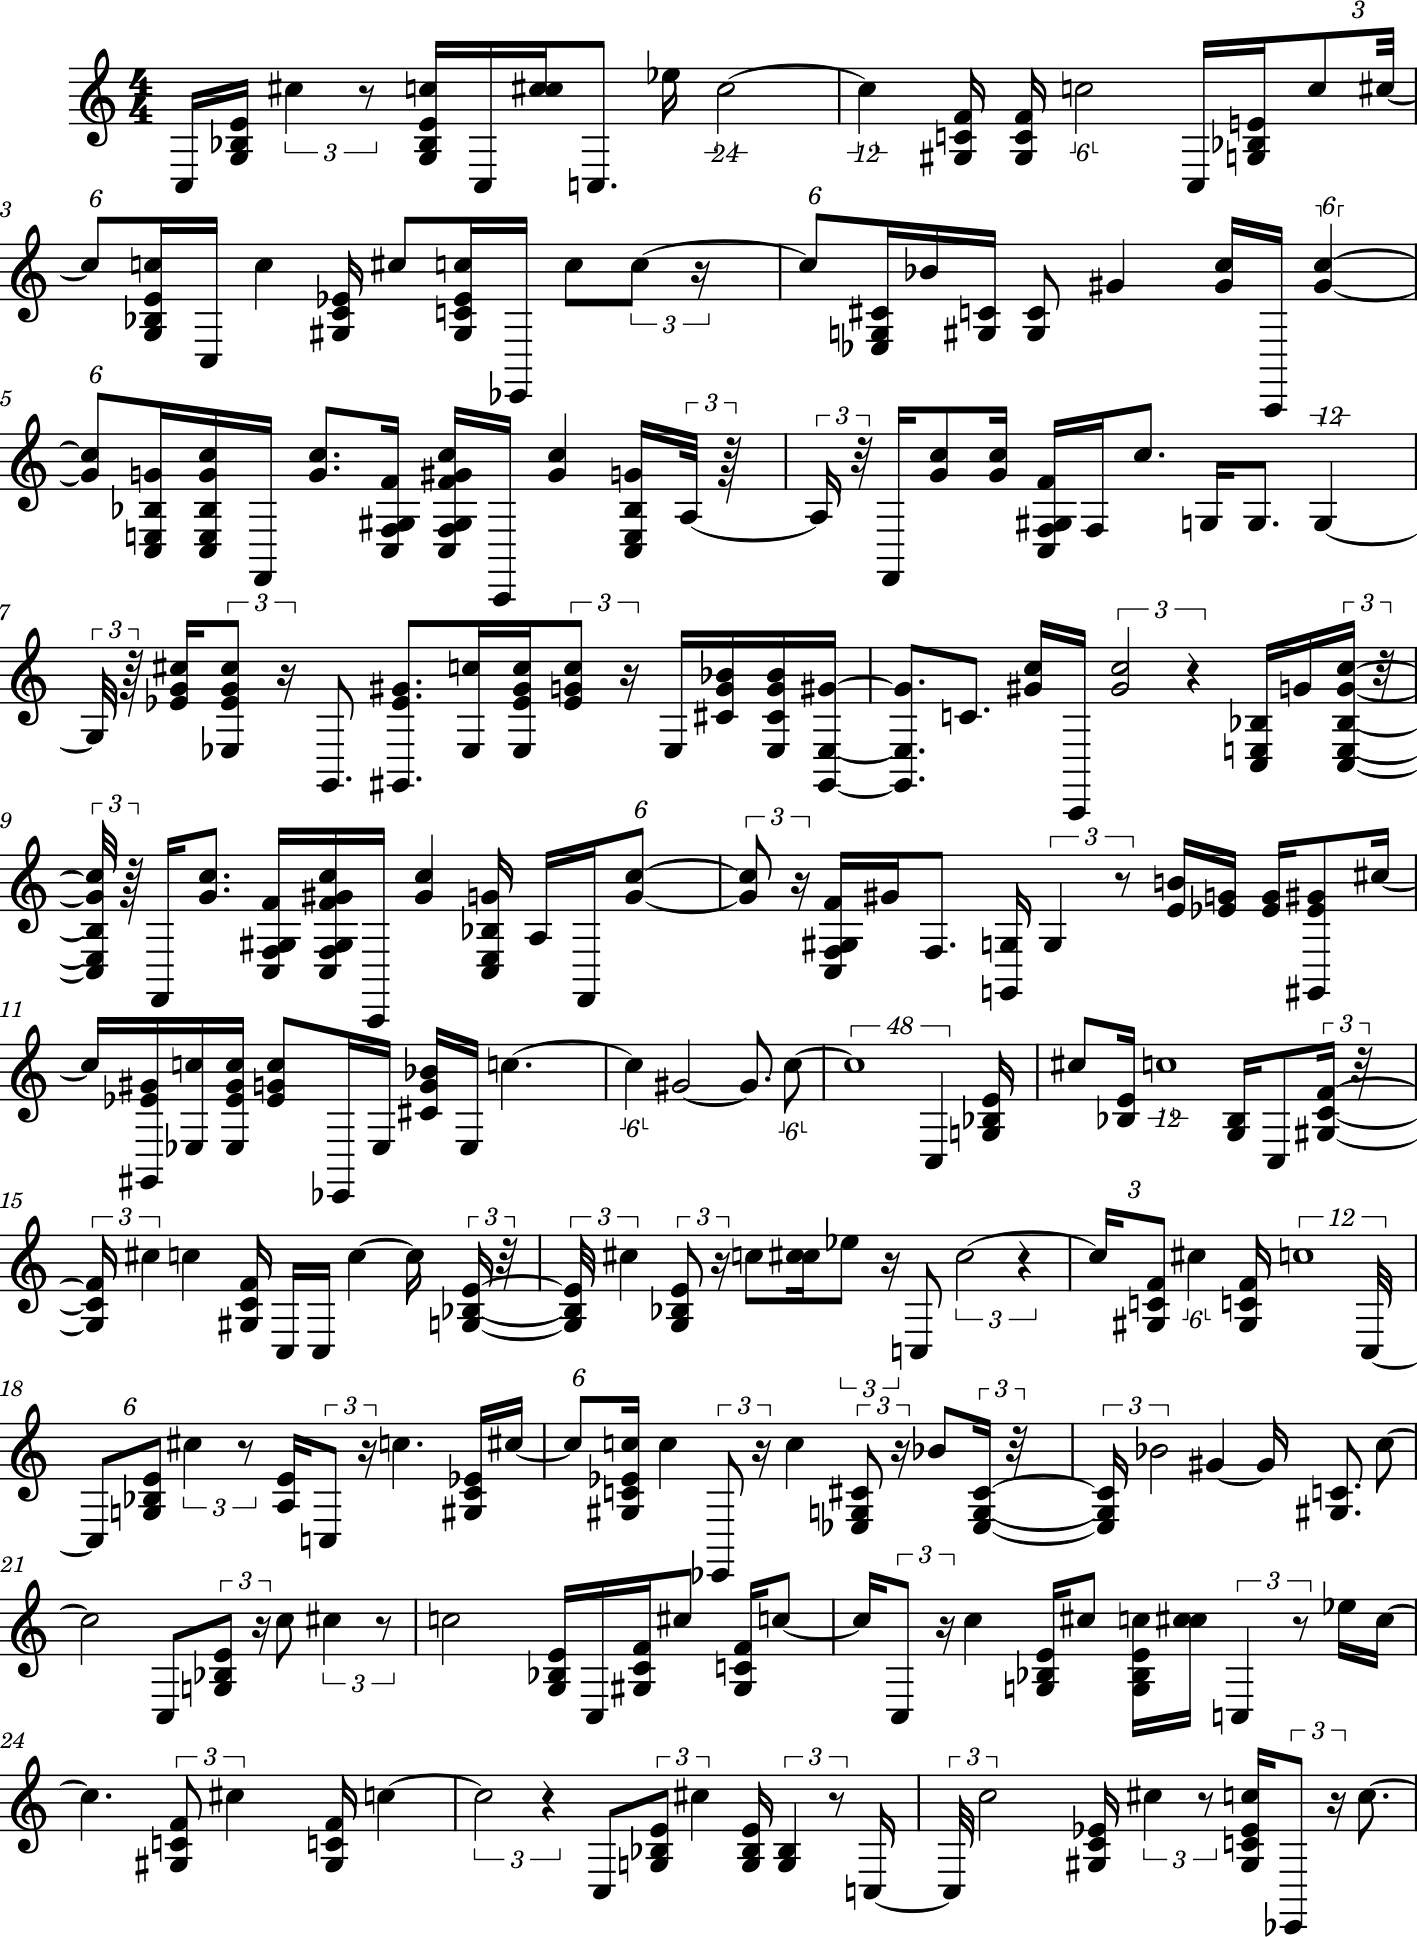

In [14]:
midi_stream.show()